In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
wine=pd.read_csv("C:\\Users\\hp\\Desktop\\wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### 1. Exploratory Data Analysis 

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
wine1=wine.drop("Type",axis=1)
wine1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
wine1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Treating outliers

<Axes: >

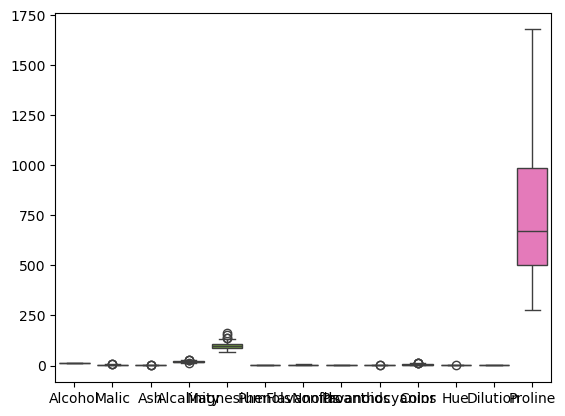

In [11]:
sns.boxplot(data=wine1,orient='v')

In [13]:
Q1 = wine1['Ash'].quantile(0.25)
Q3 = wine1['Ash'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
wine1 = wine1[(wine1['Ash'] >= lower_bound) & (wine1['Ash'] <= upper_bound)]

In [15]:
Q1 = wine1['Malic'].quantile(0.25)
Q3 = wine1['Malic'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
wine1 = wine1[(wine1['Malic'] >= lower_bound) & (wine1['Malic'] <= upper_bound)]

In [17]:
Q1 = wine1['Alcalinity'].quantile(0.25)
Q3 = wine1['Alcalinity'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
wine1 = wine1[(wine1['Alcalinity'] >= lower_bound) & (wine1['Alcalinity'] <= upper_bound)]

In [19]:
Q1 = wine1['Magnesium'].quantile(0.25)
Q3 = wine1['Magnesium'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
wine1 = wine1[(wine1['Magnesium'] >= lower_bound) & (wine1['Magnesium'] <= upper_bound)]

In [21]:
Q1 = wine1['Proanthocyanins'].quantile(0.25)
Q3 = wine1['Proanthocyanins'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
wine1 = wine1[(wine1['Proanthocyanins'] >= lower_bound) & (wine1['Proanthocyanins'] <= upper_bound)]

In [23]:
Q1 = wine1['Color'].quantile(0.25)
Q3 = wine1['Color'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
wine1 = wine1[(wine1['Color'] >= lower_bound) & (wine1['Color'] <= upper_bound)]

In [25]:
Q1 = wine1['Hue'].quantile(0.25)
Q3 = wine1['Hue'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
wine1 = wine1[(wine1['Hue'] >= lower_bound) & (wine1['Hue'] <= upper_bound)]

In [27]:
wine1.reset_index(drop=True, inplace=True)

<Axes: >

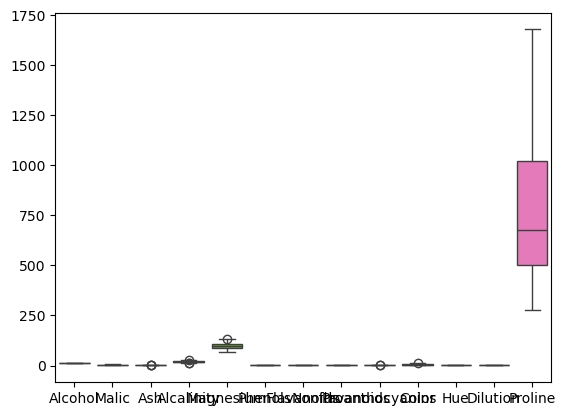

In [29]:
sns.boxplot(wine1)

In [31]:
wine1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,13.034596,2.318199,2.364658,19.300621,98.590062,2.280435,2.026894,0.359006,1.538758,5.033913,0.956932,2.619876,753.819876
std,0.791422,1.053406,0.241922,2.974149,12.401347,0.628964,0.981421,0.121821,0.513838,2.155207,0.217376,0.713409,317.816297
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000
25%,12.370000,1.610000,2.230000,17.200000,88.000000,1.700000,1.200000,0.270000,1.240000,3.270000,0.790000,2.000000,502.000000
50%,13.070000,1.860000,2.360000,19.000000,98.000000,2.320000,2.130000,0.340000,1.480000,4.800000,0.960000,2.780000,675.000000
75%,13.690000,3.100000,2.540000,21.000000,106.000000,2.800000,2.900000,0.430000,1.870000,6.200000,1.120000,3.180000,1020.000000
max,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,2.910000,10.680000,1.450000,4.000000,1680.000000


In [33]:
wine1.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.096651,0.225343,-0.338434,0.421233,0.325599,0.302557,-0.175275,0.215463,0.540855,-0.010480,0.108512,0.652425
Malic,0.096651,1.000000,0.183716,0.311024,0.030146,-0.369455,-0.460262,0.299642,-0.241993,0.304192,-0.582454,-0.399525,-0.182090
Ash,0.225343,0.183716,1.000000,0.320691,0.421118,0.106043,0.043875,0.090586,0.031043,0.210859,-0.043165,-0.032896,0.271846
Alcalinity,-0.338434,0.311024,0.320691,1.000000,-0.176902,-0.453056,-0.507433,0.340402,-0.308068,-0.031718,-0.318442,-0.375677,-0.472429
Magnesium,0.421233,0.030146,0.421118,-0.176902,1.000000,0.239446,0.199186,-0.235835,0.099609,0.346902,-0.021651,0.021406,0.449599
Phenols,0.325599,-0.369455,0.106043,-0.453056,0.239446,1.000000,0.882622,-0.497526,0.642021,-0.065892,0.471543,0.706372,0.515427
Flavanoids,0.302557,-0.460262,0.043875,-0.507433,0.199186,0.882622,1.000000,-0.597872,0.737851,-0.171084,0.589664,0.784737,0.524336
Nonflavanoids,-0.175275,0.299642,0.090586,0.340402,-0.235835,-0.497526,-0.597872,1.000000,-0.430748,0.110328,-0.279525,-0.525896,-0.310505
Proanthocyanins,0.215463,-0.241993,0.031043,-0.308068,0.099609,0.642021,0.737851,-0.430748,1.000000,-0.041662,0.345698,0.585839,0.367174
Color,0.540855,0.304192,0.210859,-0.031718,0.346902,-0.065892,-0.171084,0.110328,-0.041662,1.000000,-0.484898,-0.425764,0.360802


### 2. Dimensionality Reduction with PCA

In [35]:
def get_standardized(x):
    return ((x-x.mean())/x.std())

In [37]:
wine_normal=get_standardized(wine1)
wine_normal

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.510451,-0.577364,0.270094,-1.244262,2.290875,0.826065,1.052663,-0.648546,1.462021,0.281220,0.382140,1.822411,0.979119
1,0.208996,-0.510913,-0.928639,-2.723677,0.113692,0.587578,0.746984,-0.812721,-0.503578,-0.303411,0.428144,1.093516,0.931922
2,0.158454,0.039682,1.262149,-0.235570,0.194329,0.826065,1.236071,-0.484370,2.474013,0.299780,0.336137,0.771120,1.356696
3,1.687347,-0.349532,0.559443,-0.840785,1.161966,2.495478,1.490804,-0.976897,1.247946,1.283444,-0.445916,1.163602,2.284905
4,0.259538,0.258021,2.088861,0.571383,1.565148,0.826065,0.675659,0.254422,0.547336,-0.331250,0.382140,0.434707,-0.059216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.422002,0.182077,0.476772,0.235153,-0.612035,-0.954641,-1.352014,0.664861,-0.581424,2.165030,-1.549992,-1.275391,-0.295202
157,0.461705,1.511100,0.476772,1.243845,0.274965,-0.763851,-1.301067,0.582773,-0.250580,1.051448,-1.181967,-1.485649,-0.012019
158,0.297444,1.862342,-0.432612,0.235153,1.726420,-1.097734,-1.362203,0.582773,-0.367349,2.397026,-1.688001,-1.485649,0.255431
159,0.171089,0.258021,0.022080,0.235153,1.726420,-1.002339,-1.372393,1.403653,-0.153273,1.979433,-1.641998,-1.401546,0.271163


In [39]:
pca = PCA()
pca_values = pca.fit_transform(wine_normal)

In [41]:
pca_values

array([[-3.4926305 , -1.60443944,  0.03928939, ..., -0.31496881,
         0.60403734,  0.11973925],
       [-2.33535528,  0.33013431, -1.9721773 , ..., -0.21639125,
         0.32431419, -0.07527885],
       [-2.65307106, -0.93327076,  1.12302929, ..., -0.08570518,
        -0.00884895, -0.00719997],
       ...,
       [ 2.6477695 , -3.16980306, -1.02306659, ...,  0.80112899,
         0.53790887,  0.0482    ],
       [ 2.34676479, -2.63870556, -0.60455834, ...,  0.34476858,
         0.32354347,  0.16382827],
       [ 3.22401991, -2.88200135,  0.97736948, ..., -0.42216505,
        -0.0036448 ,  0.27542814]])

In [43]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine_normal)

In [45]:
pc=pd.DataFrame(data= pca_values, columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'] )
pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-3.492631,-1.604439,0.039289,-0.145347,0.591038,0.469907,-0.772072,0.489762,-0.515139,-1.179998,-0.314969,0.604037,0.119739
1,-2.335355,0.330134,-1.972177,-0.679779,0.456649,1.202636,-0.088905,-0.902593,0.448804,0.066297,-0.216391,0.324314,-0.075279
2,-2.653071,-0.933271,1.123029,1.020621,-0.759785,-0.587720,-0.538264,0.306173,1.162205,-0.199193,-0.085705,-0.008849,-0.007200
3,-3.913091,-2.702396,-0.145841,0.619801,-0.204948,-0.412607,0.012059,-0.948356,-0.332890,-0.186932,0.508205,-0.241858,0.356178
4,-1.029619,-1.071054,2.438233,-0.201059,0.118865,0.407873,-0.732509,0.066500,-0.412987,0.053540,-0.355127,-0.095719,-0.044984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2.398343,-2.235213,-0.987093,0.101438,-0.692842,-1.039288,0.693850,-0.180220,-0.286204,-0.052818,-0.980865,0.334960,0.263611
157,2.634640,-1.926649,0.309489,0.636726,-0.102481,-0.188647,0.137675,0.482597,0.071116,0.077156,0.303938,-0.307105,0.291644
158,2.647769,-3.169803,-1.023067,0.538086,0.793783,-0.079633,-0.951666,0.557854,0.031319,-0.011783,0.801129,0.537909,0.048200
159,2.346765,-2.638706,-0.604558,-0.526217,0.265971,-0.861180,-1.391298,0.161243,-0.121865,-0.717233,0.344769,0.323543,0.163828


In [47]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.38552403, 0.20659478, 0.09511346, 0.06982522, 0.0570396 ,
       0.0430487 , 0.03540683, 0.02650788, 0.02392518, 0.02007854,
       0.01788083, 0.01328436, 0.00577061])

In [49]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([38.55, 59.21, 68.72, 75.7 , 81.4 , 85.7 , 89.24, 91.89, 94.28,
       96.29, 98.08, 99.41, 99.99])

In [51]:
pca.components_

array([[-0.17161178,  0.23752985, -0.01057842,  0.27482858, -0.12570021,
        -0.39126654, -0.42377451,  0.29348719, -0.32425906,  0.06495018,
        -0.28769489, -0.36242847, -0.28353394],
       [-0.4486929 , -0.25097967, -0.31079489,  0.03911351, -0.39482154,
        -0.03328129,  0.03043168, -0.02140495,  0.00136401, -0.50807388,
         0.25921425,  0.18089061, -0.34803769],
       [-0.18081562,  0.07026231,  0.70464382,  0.55185965,  0.18359623,
         0.09807092,  0.07288013,  0.05422099,  0.09137648, -0.2347088 ,
         0.14177781,  0.14242605, -0.0767855 ],
       [-0.0234822 ,  0.54091995, -0.14274413,  0.16633094, -0.27606225,
         0.14508138,  0.12820207, -0.25380609,  0.46205712,  0.07236153,
        -0.42696817,  0.18492779, -0.21322986],
       [-0.22772023, -0.05486988, -0.09558633, -0.0076764 ,  0.55366648,
        -0.10895041, -0.06425073, -0.69938912, -0.2079152 , -0.10021844,
        -0.19386809, -0.03446038, -0.17944983],
       [ 0.15633971,  0.636931

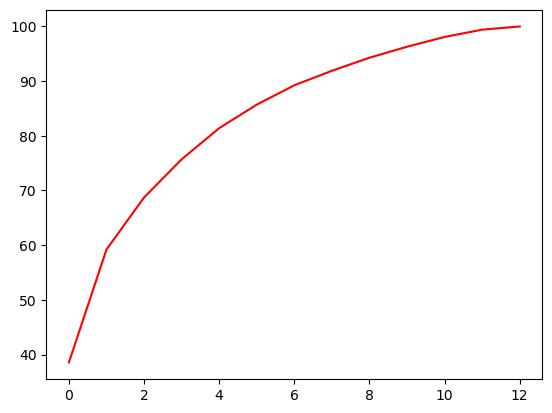

In [53]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [55]:
variances=pd.DataFrame()
variances["variance"]=pd.DataFrame(pca.explained_variance_ratio_)
variances["percentage"]=pd.DataFrame(pca.explained_variance_ratio_*100)
variances["cumsum"]=pd.DataFrame(var1)
                   
variances

,variance,percentage,cumsum
0,0.385524,38.552403,38.55
1,0.206595,20.659478,59.21
2,0.095113,9.511346,68.72
3,0.069825,6.982522,75.70
4,0.057040,5.703960,81.40
5,0.043049,4.304870,85.70
6,0.035407,3.540683,89.24
7,0.026508,2.650788,91.89
8,0.023925,2.392518,94.28
9,0.020079,2.007854,96.29


### 3. Clustering with Original Data

##### KMeans

In [57]:
from sklearn.cluster import KMeans

In [59]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(wine_normal)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [61]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [63]:
kmeans.inertia_

1073.7080550479513

In [65]:
import warnings
warnings.filterwarnings("ignore")
inertia=[]
k=list(range(2,8))
for i in k:
    kc=KMeans(n_clusters=i)
    kc.fit(wine_normal)
    inertia.append(kc.inertia_)
    print(i,inertia)

2 [1444.7296931679418]
3 [1444.7296931679418, 1073.7080550479513]
4 [1444.7296931679418, 1073.7080550479513, 1001.8649741052404]
5 [1444.7296931679418, 1073.7080550479513, 1001.8649741052404, 955.8347413778545]
6 [1444.7296931679418, 1073.7080550479513, 1001.8649741052404, 955.8347413778545, 897.8817162017428]
7 [1444.7296931679418, 1073.7080550479513, 1001.8649741052404, 955.8347413778545, 897.8817162017428, 846.917606282421]


In [67]:
k

[2, 3, 4, 5, 6, 7]

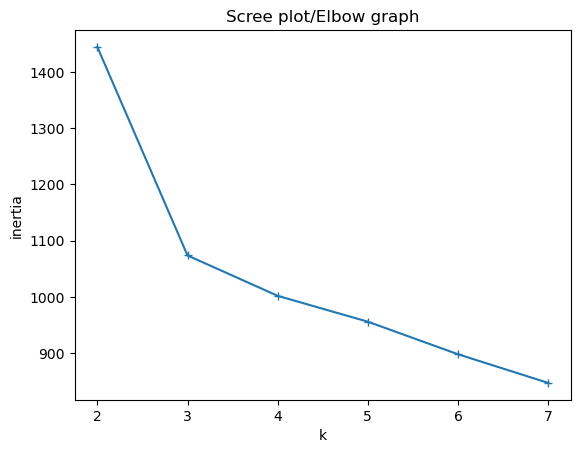

In [69]:
plt.plot(k,inertia,marker='+')
plt.title("Scree plot/Elbow graph")
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

In [71]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(wine_normal)
labels_3=kmeans.labels_
labels_3

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [73]:
from sklearn.metrics import silhouette_score
ss_3=silhouette_score(wine_normal,labels_3)

In [75]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(wine_normal)
labels_5=kmeans.labels_
labels_5

array([1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1,
       3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 4, 4, 2, 3, 4, 4, 2,
       2, 3, 2, 4, 4, 4, 2, 4, 4, 4, 2, 0, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [77]:
ss_5=silhouette_score(wine_normal,labels_5)

In [79]:
print(ss_3, ss_5)

0.3013979201701521 0.17872343982098382


In [81]:
wine1['clusterid'] = labels_3
wine1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,1
157,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
158,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
159,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [83]:
wine1.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,12.277069,1.845345,2.259310,20.187931,91.086207,2.241034,2.067414,0.359310,1.560862,3.011207,1.060793,2.824138,506.172414
1,1,13.108478,3.293261,2.399783,21.050000,98.739130,1.641957,0.799565,0.448043,1.087609,6.972174,0.700217,1.693261,620.804348
2,2,13.745789,2.012456,2.443509,16.985965,106.105263,2.835789,2.976140,0.286842,1.880351,5.527895,1.058421,3.159825,1113.157895


##### DBSCAN

In [85]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps= 3, min_samples= 20)
labels=dbscan.fit_predict(wine_normal)

In [87]:
pd.Series(labels).value_counts()

 0    106
 1     42
-1     13
Name: count, dtype: int64

In [89]:
silhouette_score(wine_normal,labels)

0.21620005928195898

In [91]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0,  1,  0,  0, -1, -1,  0,  0,  0,  0, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [93]:
wine1['cluster']=dbscan.labels_
wine1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,0


In [95]:
wine1.groupby('cluster').agg(['mean']).reset_index()

,cluster,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,12.364615,2.093846,2.540769,20.792308,105.307692,2.075385,1.755385,0.360769,1.431538,3.959231,0.936154,2.321538,551.846154,0.307692
1,0,13.084434,1.908019,2.330189,18.425472,98.330189,2.563868,2.568302,0.318113,1.730849,4.375660,1.062509,3.011698,826.783019,1.075472
2,1,13.116190,3.422857,2.397143,21.047619,97.166667,1.628571,0.744524,0.461667,1.087143,7.027857,0.696905,1.723333,632.190476,1.000000


##### Agglomerative clustering

In [97]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [99]:
dm=sch.linkage(wine_normal, metric='euclidean',method='complete')

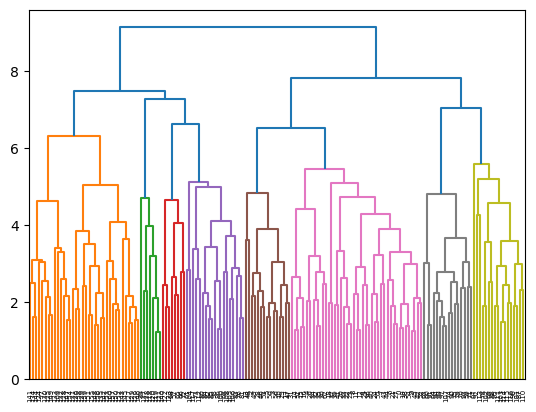

In [101]:
dendrogram = sch.dendrogram(dm)
plt.show()

In [103]:
hc = AgglomerativeClustering(n_clusters=4, metric= 'euclidean', linkage = 'complete')
hc.fit(wine_normal)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [105]:
hc.labels_
pd.Series(hc.labels_).value_counts()

2    58
3    36
0    34
1    33
Name: count, dtype: int64

In [107]:
wine1['h_clusterid'] = hc.labels_

In [109]:
wine1.groupby(['h_clusterid']).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid,cluster
h_clusterid,,,,,,,,,,,,,,,
0,12.406176,2.039118,2.393529,21.261765,97.029412,1.835588,1.499118,0.424706,1.248235,3.795882,0.965176,2.237059,539.147059,0.294118,-0.117647
1,12.305455,1.759394,2.136970,19.263636,89.000000,2.470606,2.337273,0.293636,1.711212,3.114848,1.051515,3.020000,485.727273,0.000000,-0.090909
2,13.722069,1.998621,2.445517,17.005172,105.965517,2.828621,2.970517,0.288276,1.883793,5.511897,1.060690,3.145000,1105.655172,1.965517,0.000000
3,13.188889,3.608889,2.415833,21.180556,96.972222,1.643056,0.720556,0.470833,1.099167,7.192222,0.695278,1.768611,635.472222,1.000000,1.000000


#### Visualization

In [111]:
from bioinfokit.visuz import cluster
from sklearn.manifold import TSNE

wine2 = TSNE(n_components=2).fit_transform(wine_normal)
cluster.tsneplot(score= wine2)
pd.DataFrame(wine2)

,0,1
0,13.031039,-2.283858
1,8.351714,-2.437824
2,10.718377,0.949529
3,13.286584,-0.256432
4,7.841156,2.605511
...,...,...
156,-13.480246,-0.421767
157,-12.765525,0.348269
158,-13.127679,1.179182
159,-13.430867,0.724559


##### Visualization of KMeans with original data

In [113]:
final1= pd.concat([pd.DataFrame(wine2,columns=['Feature1','Feature2']), wine1[['clusterid']]], axis = 1)

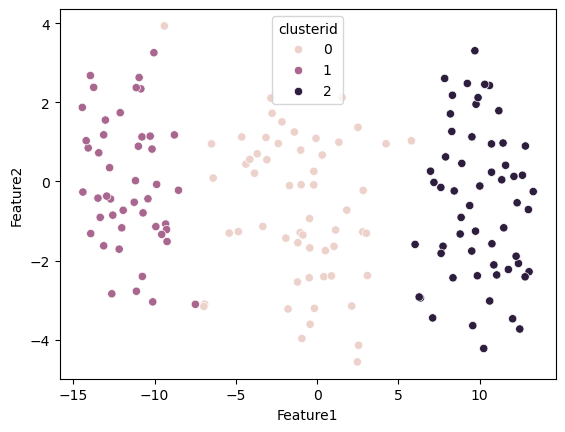

In [115]:
sns.scatterplot(data= final1,x='Feature1',y='Feature2',hue='clusterid')
plt.show()

##### Visualization of DBSCAN with original data

In [117]:
final2= pd.concat([pd.DataFrame(wine2,columns=['Feature1','Feature2']), wine1[['cluster']]], axis = 1)

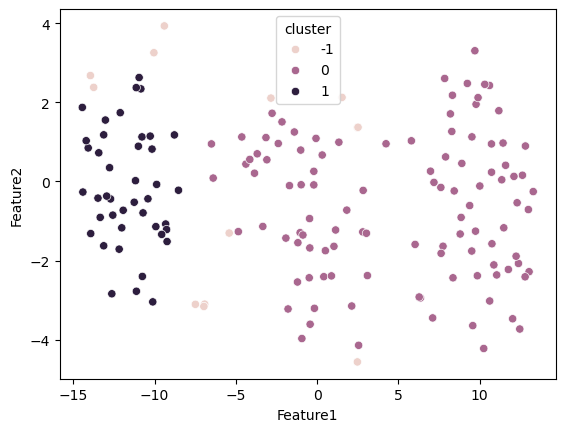

In [119]:
sns.scatterplot(data= final2,x='Feature1',y='Feature2',hue='cluster')
plt.show()

##### Visualization of Hierarchical clustering with original data

In [121]:
final3= pd.concat([pd.DataFrame(wine2,columns=['Feature1','Feature2']), wine1[['h_clusterid']]], axis = 1)

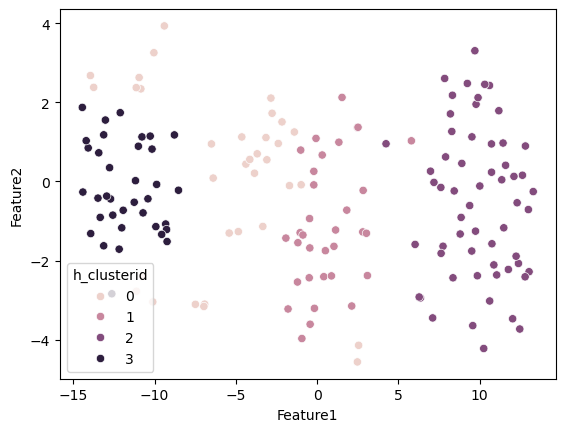

In [123]:
sns.scatterplot(data= final3,x='Feature1',y='Feature2',hue='h_clusterid')
plt.show()

### 4. Clustering with PCA Data

##### KMeans

In [125]:
kmeans1=KMeans(n_clusters= 3)
kmeans1.fit(pc)

KMeans(n_clusters=3)

In [127]:
kmeans1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [129]:
kmeans1.inertia_

1073.7080550479504

In [131]:
import warnings
warnings.filterwarnings("ignore")
inertia=[]
k=list(range(2,8))
for i in k:
    kc1=KMeans(n_clusters=i)
    kc1.fit(pc)
    inertia.append(kc1.inertia_)
    print(i,inertia)

2 [1444.7296931679402]
3 [1444.7296931679402, 1073.7080550479504]
4 [1444.7296931679402, 1073.7080550479504, 1030.505337923221]
5 [1444.7296931679402, 1073.7080550479504, 1030.505337923221, 966.6892892415253]
6 [1444.7296931679402, 1073.7080550479504, 1030.505337923221, 966.6892892415253, 892.312271407387]
7 [1444.7296931679402, 1073.7080550479504, 1030.505337923221, 966.6892892415253, 892.312271407387, 867.8353557815788]


In [133]:
k

[2, 3, 4, 5, 6, 7]

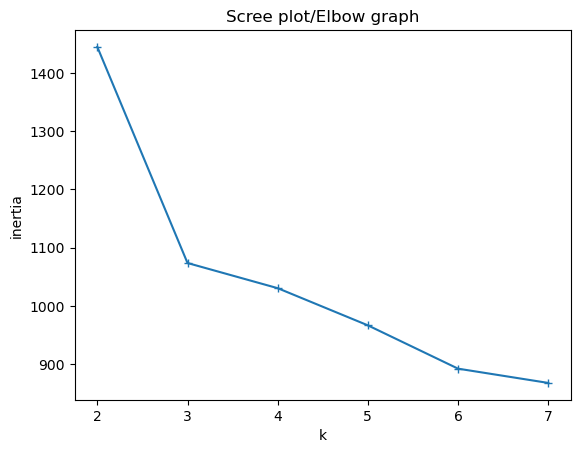

In [135]:
plt.plot(k,inertia,marker='+')
plt.title("Scree plot/Elbow graph")
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

In [137]:
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(pc)
labels_3=kmeans1.labels_
labels_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [139]:
ss_3_pc=silhouette_score(pc,labels_3)

In [141]:
print(ss_3_pc)

0.30139792017015204


In [143]:
pc['cluster'] = labels_3
pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,cluster
0,-3.492631,-1.604439,0.039289,-0.145347,0.591038,0.469907,-0.772072,0.489762,-0.515139,-1.179998,-0.314969,0.604037,0.119739,0
1,-2.335355,0.330134,-1.972177,-0.679779,0.456649,1.202636,-0.088905,-0.902593,0.448804,0.066297,-0.216391,0.324314,-0.075279,0
2,-2.653071,-0.933271,1.123029,1.020621,-0.759785,-0.587720,-0.538264,0.306173,1.162205,-0.199193,-0.085705,-0.008849,-0.007200,0
3,-3.913091,-2.702396,-0.145841,0.619801,-0.204948,-0.412607,0.012059,-0.948356,-0.332890,-0.186932,0.508205,-0.241858,0.356178,0
4,-1.029619,-1.071054,2.438233,-0.201059,0.118865,0.407873,-0.732509,0.066500,-0.412987,0.053540,-0.355127,-0.095719,-0.044984,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2.398343,-2.235213,-0.987093,0.101438,-0.692842,-1.039288,0.693850,-0.180220,-0.286204,-0.052818,-0.980865,0.334960,0.263611,2
157,2.634640,-1.926649,0.309489,0.636726,-0.102481,-0.188647,0.137675,0.482597,0.071116,0.077156,0.303938,-0.307105,0.291644,2
158,2.647769,-3.169803,-1.023067,0.538086,0.793783,-0.079633,-0.951666,0.557854,0.031319,-0.011783,0.801129,0.537909,0.048200,2
159,2.346765,-2.638706,-0.604558,-0.526217,0.265971,-0.861180,-1.391298,0.161243,-0.121865,-0.717233,0.344769,0.323543,0.163828,2


In [145]:
pc.groupby('cluster').agg(['mean']).reset_index()

,cluster,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,-2.375759,-0.939758,-0.052355,-0.095628,-0.103089,0.170900,0.082362,-0.042817,0.071506,-0.081870,0.008274,-0.004989,-0.031764
1,1,0.132843,1.855070,0.277801,0.021124,0.071790,-0.092822,-0.100177,0.050154,-0.061371,0.026110,0.024335,0.014126,-0.008583
2,2,2.776377,-1.174519,-0.285395,0.091862,0.037222,-0.094731,0.024253,-0.010182,-0.011224,0.068526,-0.040936,-0.011630,0.050183


##### DBSCAN

In [147]:
dbscan = DBSCAN(eps= 3, min_samples= 20)
labels=dbscan.fit_predict(pc)

In [149]:
pd.Series(labels).value_counts()

 0    104
 1     42
-1     15
Name: count, dtype: int64

In [151]:
silhouette_score(pc,labels)

0.2137115740295491

In [153]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0,  1,  0,  0, -1, -1,  0,  0,  0,  0, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [155]:
pc['clusterid']=dbscan.labels_
pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,cluster,clusterid
0,-3.492631,-1.604439,0.039289,-0.145347,0.591038,0.469907,-0.772072,0.489762,-0.515139,-1.179998,-0.314969,0.604037,0.119739,0,0
1,-2.335355,0.330134,-1.972177,-0.679779,0.456649,1.202636,-0.088905,-0.902593,0.448804,0.066297,-0.216391,0.324314,-0.075279,0,0
2,-2.653071,-0.933271,1.123029,1.020621,-0.759785,-0.587720,-0.538264,0.306173,1.162205,-0.199193,-0.085705,-0.008849,-0.007200,0,0
3,-3.913091,-2.702396,-0.145841,0.619801,-0.204948,-0.412607,0.012059,-0.948356,-0.332890,-0.186932,0.508205,-0.241858,0.356178,0,0
4,-1.029619,-1.071054,2.438233,-0.201059,0.118865,0.407873,-0.732509,0.066500,-0.412987,0.053540,-0.355127,-0.095719,-0.044984,0,0


In [157]:
pc.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,0.469957,0.508906,1.111313,-0.292726,0.690754,-0.259217,-0.255579,-0.029630,0.038537,0.111633,-0.203380,-0.164745,0.061738,1.266667
1,0,-1.225042,0.403809,-0.033038,-0.024035,-0.050956,0.044800,0.016883,0.016771,-0.016574,-0.039413,0.031634,0.009582,-0.038886,0.451923
2,1,2.865596,-1.181660,-0.315089,0.164061,-0.120521,-0.018355,0.049472,-0.030946,0.027276,0.057726,-0.005695,0.035111,0.074240,2.000000


##### Agglomerative clustering

In [160]:
dm=sch.linkage(pc, metric='euclidean',method='complete')

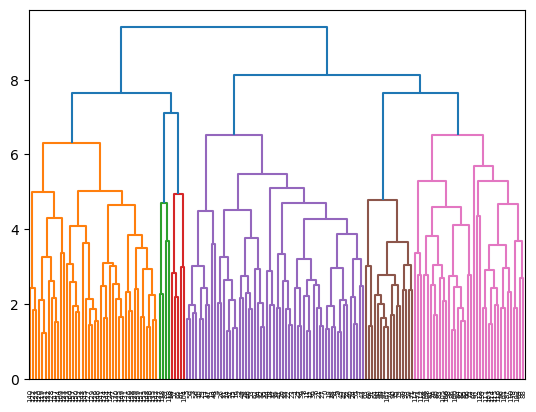

In [162]:
dendrogram = sch.dendrogram(dm)
plt.show()

In [172]:
pc['hc_cluster'] = hc.labels_

In [ ]:
pc.groupby(['hc_cluster']).mean()

In [168]:
hc = AgglomerativeClustering(n_clusters=3, metric= 'euclidean', linkage = 'complete')
hc.fit(pc)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [170]:
hc.labels_
pd.Series(hc.labels_).value_counts()

2    58
1    52
0    51
Name: count, dtype: int64

In [174]:
pc.groupby(['hc_cluster']).mean()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,cluster,clusterid
hc_cluster,,,,,,,,,,,,,,,
0,2.602688,-0.993858,-0.168311,-0.136067,0.072106,-0.027640,-0.055429,-0.006752,-0.002267,0.096939,-0.055959,-0.015189,0.049183,1.901961,0.666667
1,0.070438,1.989740,0.208266,0.250690,0.048589,-0.143314,-0.018347,0.046455,-0.088613,-0.017720,0.057803,0.022632,-0.011117,1.000000,-0.134615
2,-2.351722,-0.909995,-0.038724,-0.105111,-0.106966,0.152792,0.065189,-0.035712,0.081440,-0.069353,-0.002618,-0.006935,-0.033280,0.017241,0.000000


#### Visualization

##### Visualization of KMeans with PCA data

In [188]:
final_pc1= pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['PC1','PC2']), pc[['cluster']]], axis = 1)
final_pc1

,PC1,PC2,cluster
0,-3.492631,-1.604439,0
1,-2.335355,0.330134,0
2,-2.653071,-0.933271,0
3,-3.913091,-2.702396,0
4,-1.029619,-1.071054,0
...,...,...,...
156,2.398343,-2.235213,2
157,2.634640,-1.926649,2
158,2.647769,-3.169803,2
159,2.346765,-2.638706,2


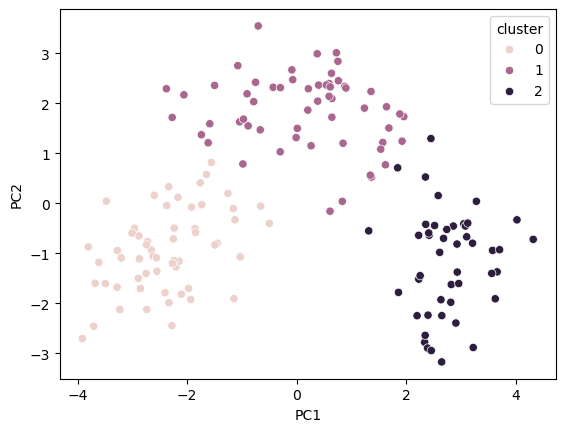

In [190]:
sns.scatterplot(data=final_pc1,x='PC1',y='PC2',hue='cluster')
plt.show()

##### Visualization of DBSCAN with PCA data

In [193]:
final_pc2= pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['PC1','PC2']), pc[['clusterid']]], axis = 1)
final_pc2

,PC1,PC2,clusterid
0,-3.492631,-1.604439,0
1,-2.335355,0.330134,0
2,-2.653071,-0.933271,0
3,-3.913091,-2.702396,0
4,-1.029619,-1.071054,0
...,...,...,...
156,2.398343,-2.235213,1
157,2.634640,-1.926649,1
158,2.647769,-3.169803,1
159,2.346765,-2.638706,1


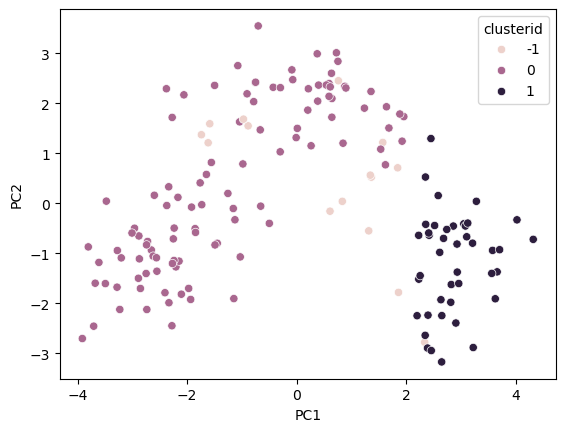

In [197]:
sns.scatterplot(data=final_pc2,x='PC1',y='PC2',hue='clusterid')
plt.show()

##### Visualization of Hierarchical clustering PCA data

In [200]:
final_pc3= pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['PC1','PC2']), pc[['hc_cluster']]], axis = 1)
final_pc3

,PC1,PC2,hc_cluster
0,-3.492631,-1.604439,2
1,-2.335355,0.330134,2
2,-2.653071,-0.933271,2
3,-3.913091,-2.702396,2
4,-1.029619,-1.071054,2
...,...,...,...
156,2.398343,-2.235213,0
157,2.634640,-1.926649,0
158,2.647769,-3.169803,0
159,2.346765,-2.638706,0


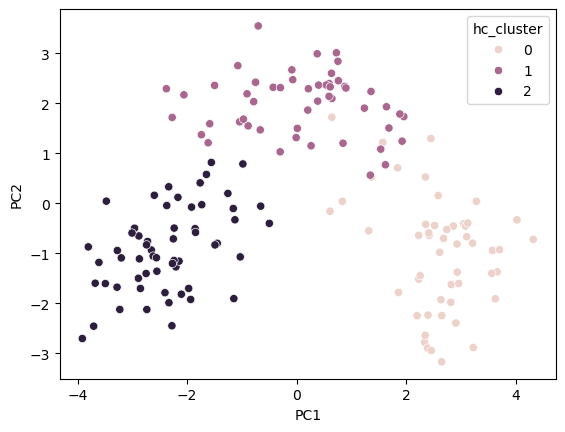

In [204]:
sns.scatterplot(data=final_pc3,x='PC1',y='PC2',hue='hc_cluster')
plt.show()

### 5. Comparision and Analysis

When we compare clustering results of Original data and PCA-transformed data we have to look into some criteria like;

1. Cluster quality
2. Visualization
3. Compare inertia of clusters

In our case, both inertia and silhouette scores are the same for clustering with original data and PCA transformed data but visualization is changed because for original high dimensional data, I use t-SNE to reduce the dimension and help us to know the distribution of the clusters throughout the space and in PCA we take first two high variance PC's to plot the distribution of clusters.

The trade-off between using PCA and clustering directly to the original dataset is that PCA can improve clustering efficiency and visualization by reducing complexity, but it might also obscure details that were present in the original high-dimensional data. Thus, increasing inertia in PCA-transformed data doesn't necessarily mean worse clustering, it could reflect a reduction in complexity or information loss.

### 6. Conclusion and Insights

##### a) The key finding of this assignment is;

##### For original data:

1. Inertia= 1073.708
2. Silhouette score= 0.301
3. Cluster size= 3

##### For PCA transformed data

1. Inertia= 1073.708
2. Silhouette score= 0.301
3. Cluster size= 3

##### b) Implication of using PCA and clustering in data analysis

The advantages and disadvantages of using PCA in practical implications are;

##### Advantage:

1. Simplified model
2. Reduced computational cost
3. Outlier reduction
4. Visualization

##### Disadvantage:

1. Loss of information
2. Difficult to interpret the result

The advantages and disadvantages of clustering in practical implications are;

##### Advantages:

1. Pattern discovery
2. Data grouping
3. Outlier detection
    
##### Disadvantages:

1. Know the right cluster
2. Cluster validity

These methods are used in various sectors and fields such as;

1. Marketing to group the customers
2. Health care to cluster the patients
3. Finance for risk management
4. Social sciences for behavioural analysis and urban planning

##### c) Recommendations for when to use PCA and Clustering

Based on the analysis we can say that PCA can be used in the case of high dimensional data to reduce the dimension, can be used to reduce noise data, visualization for the high dimension data, and feature engineering.

We use clustering in the case of EDA to know the pattern and structure of data, use for segmentation analysis.